In [ ]:
import warnings # Suppress specific
# Suppress specific
warnings.filterwarnings("ignore", category=FutureWarning)


Missing Values Summary:
                       Missing Values  Percentage
age                              1000        10.0
gender                           1000        10.0
annual_income                    1000        10.0
last_visited_days_ago            1000        10.0
session_duration                 1000        10.0
pages_visited                    1000        10.0
customer_id                         0         0.0
device                              0         0.0
purchase                            0         0.0


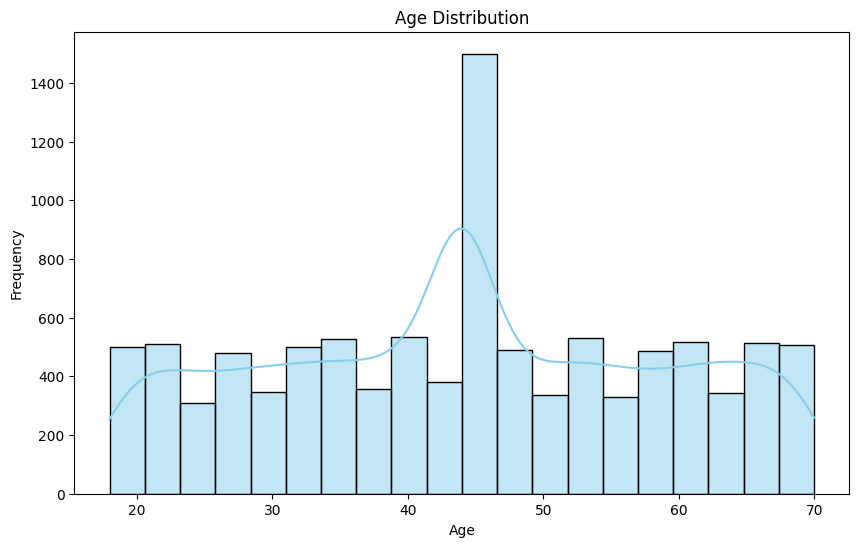

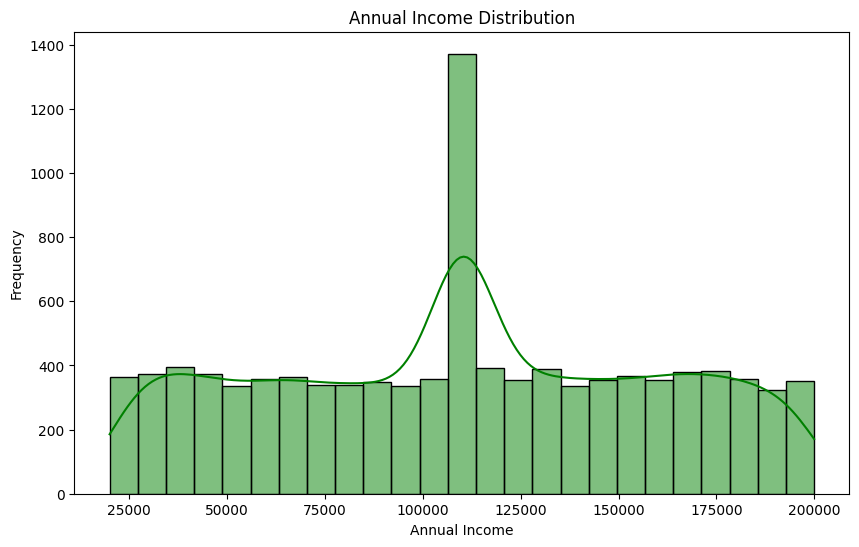

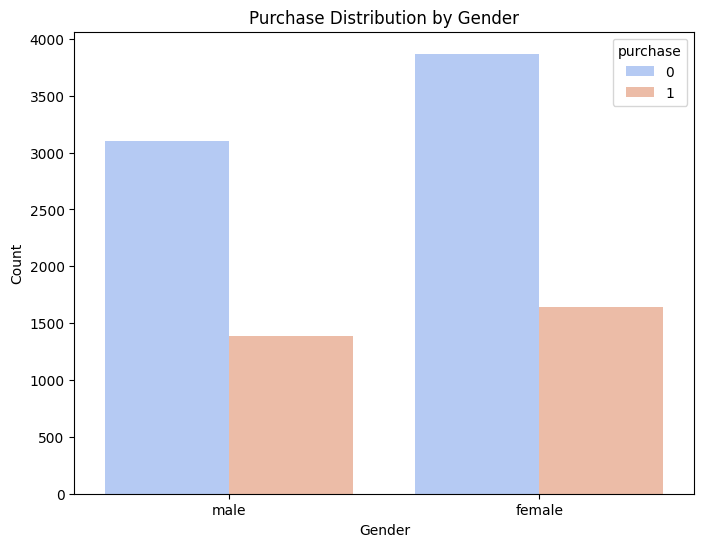

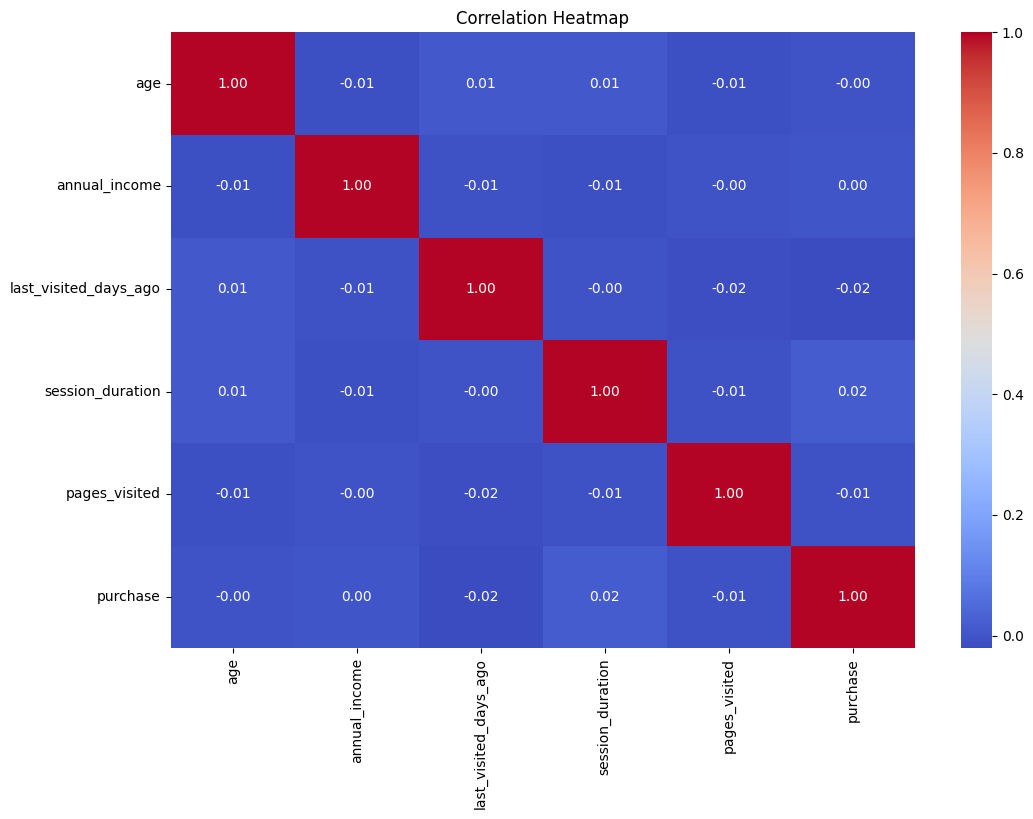

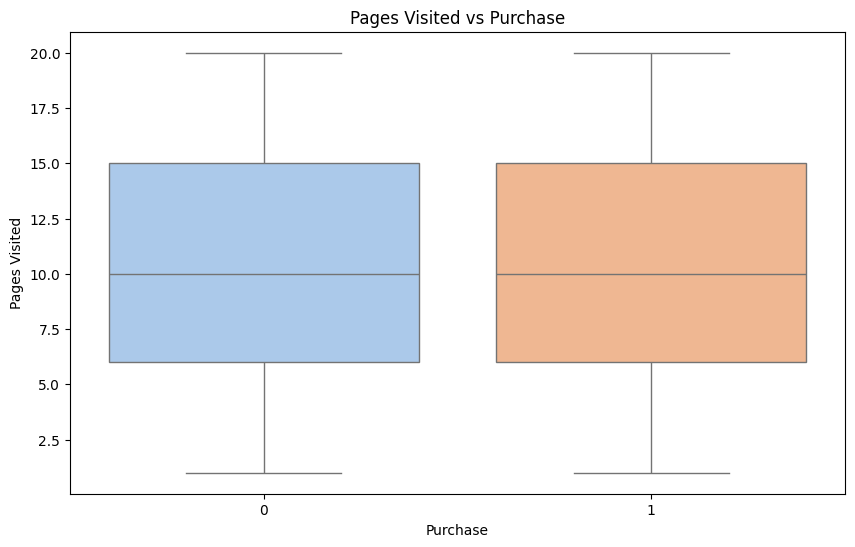


Cleaned and Preprocessed Dataset:
   customer_id   age  gender  annual_income  last_visited_days_ago  \
0            1  56.0       1       110326.5                    7.0   
1            2  69.0       0        47617.0                    4.0   
2            3  46.0       1        94258.0                   30.0   
3            4  32.0       0        70075.0                   19.0   
4            5  60.0       1       146998.0                   16.0   

   session_duration  pages_visited  device  purchase  
0              17.0           15.0     1.0         0  
1              35.0           19.0     0.0         0  
2              31.0           15.0     0.0         0  
3               4.0           12.0     0.0         0  
4              51.0           10.0     0.0         0  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/cloud_company.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Step 1: Check for Missing Values
print("Missing Values Summary:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info.sort_values(by='Missing Values', ascending=False))

# Handle Missing Values
# Fill numerical columns with median
numerical_columns = ['age', 'annual_income', 'last_visited_days_ago', 'session_duration', 'pages_visited']
categorical_columns = ['gender', 'device']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['device'].fillna(df['device'].mode()[0], inplace=True)

# Step 2: Exploratory Data Analysis (EDA)
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Annual Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['annual_income'], kde=True, color='green')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Purchase distribution by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='purchase', palette='coolwarm')
plt.title('Purchase Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[['age', 'annual_income', 'last_visited_days_ago', 'session_duration', 'pages_visited', 'purchase']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pages Visited vs Purchase
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='purchase', y='pages_visited', palette='pastel')
plt.title('Pages Visited vs Purchase')
plt.xlabel('Purchase')
plt.ylabel('Pages Visited')
plt.show()

# Step 3: Preprocessing
# Convert categorical variables into numerical ones
# Gender: male -> 1, female -> 0
df['gender'] = df['gender'].map({'male': 1, 'female': 0})

# Device: desktop -> 1, mobile -> 0
df['device'] = df['device'].map({'desktop': 1, 'mobile': 0})

# Display the cleaned and preprocessed dataset
print("\nCleaned and Preprocessed Dataset:")
print(df.head())

# # Save the cleaned dataset to a new Excel file
# df.to_excel('/mnt/data/cleaned_cloud_company.xlsx', index=False)



In [ ]:
pip install imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pickle

In [ ]:
# Feature Engineering
df['income_per_visit'] = df['annual_income'] / (df['last_visited_days_ago'] + 1)
df['pages_per_session'] = df['pages_visited'] / (df['session_duration'] + 1)

# Check for NaN values introduced by feature engineering and fill them
df['income_per_visit'].fillna(df['income_per_visit'].median(), inplace=True)
df['pages_per_session'].fillna(df['pages_per_session'].median(), inplace=True)

# Define features and target
X = df.drop(columns=['customer_id', 'purchase'])
y = df['purchase']


In [ ]:
# Step 4: Exploratory Data Analysis (EDA)
print("Statistical Summary:")
print(df.describe())
print(df.isnull().sum())

Statistical Summary:
       customer_id           age        gender  annual_income  \
count  10000.00000  10000.000000  10000.000000   10000.000000   
mean    5000.50000     44.098400      0.449000  109698.382000   
std     2886.89568     14.439182      0.497417   49322.359192   
min        1.00000     18.000000      0.000000   20016.000000   
25%     2500.75000     33.000000      0.000000   69246.750000   
50%     5000.50000     44.000000      0.000000  110326.500000   
75%     7500.25000     56.000000      1.000000  149851.750000   
max    10000.00000     70.000000      1.000000  199971.000000   

       last_visited_days_ago  session_duration  pages_visited       device  \
count           10000.000000      10000.000000   10000.000000  6672.000000   
mean               15.016300         30.836300      10.411800     0.504496   
std                 8.449697         16.394175       5.463333     0.500017   
min                 0.000000          1.000000       1.000000     0.000000   
25%

In [ ]:
# Handle missing values in the 'device' column
if df['device'].isnull().sum() > 0:
    df['device'].fillna(df['device'].mode()[0], inplace=True)

# Verify the 'device' column no longer contains missing values
# assert df['device'].isnull().sum() == 0, "There are still missing values in the 'device' column."

# print(f"Missing values in the 'device' column handled. Total missing values now: {df['device'].isnull().sum()}")
print(df.isnull().sum())


customer_id              0
age                      0
gender                   0
annual_income            0
last_visited_days_ago    0
session_duration         0
pages_visited            0
device                   0
purchase                 0
income_per_visit         0
pages_per_session        0
dtype: int64


In [ ]:
print("Checking for missing values after preprocessing:")
print(X.isnull().sum())  # This will show which columns still contain NaN values


Checking for missing values after preprocessing:
age                         0
gender                      0
annual_income               0
last_visited_days_ago       0
session_duration            0
pages_visited               0
device                   3328
income_per_visit            0
pages_per_session           0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Impute all numerical columns
numerical_imputer = SimpleImputer(strategy='median')
X[numerical_columns] = numerical_imputer.fit_transform(X[numerical_columns])

# Impute all categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])


In [ ]:
assert not X.isnull().values.any(), "There are still NaN values in X after preprocessing!"


In [ ]:
# Step 2: Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#  Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'k-NN': KNeighborsClassifier()
}

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:44:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Display Results
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


Model Performance:
Logistic Regression: {'Accuracy': 0.5193687230989957, 'Precision': 0.5101914762198888, 'Recall': 0.6016023306627822, 'F1 Score': 0.5521390374331551}
Random Forest: {'Accuracy': 0.7352941176470589, 'Precision': 0.8216818642350557, 'Recall': 0.5906773488710853, 'F1 Score': 0.6872881355932203}
Gradient Boosting: {'Accuracy': 0.7356527977044476, 'Precision': 0.9877300613496932, 'Recall': 0.4690458849235251, 'F1 Score': 0.6360493827160494}
Support Vector Machine: {'Accuracy': 0.6703730272596844, 'Precision': 0.9558232931726908, 'Recall': 0.3466860888565186, 'F1 Score': 0.5088188134687333}
XGBoost: {'Accuracy': 0.7374461979913917, 'Precision': 0.8214643931795386, 'Recall': 0.596504005826657, 'F1 Score': 0.6911392405063291}
k-NN: {'Accuracy': 0.6345050215208035, 'Precision': 0.6271551724137931, 'Recall': 0.6358339402767662, 'F1 Score': 0.6314647377938517}


In [ ]:
# Identify Best Model by F1 Score
best_model_name = max(results, key=lambda x: results[x]['F1 Score'])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: XGBoost


In [ ]:
 #Step 6: Save Best Model
model_path = '/content/best_model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [ ]:
# Step 7: Function for Preprocessing and Making Predictions
def preprocess_new_data(new_data):
    new_data = pd.DataFrame(new_data)
    new_data[numerical_columns] = numerical_imputer.transform(new_data[numerical_columns])
    new_data['gender'] = new_data['gender'].map({'male': 1, 'female': 0})
    new_data['device'] = new_data['device'].map({'desktop': 1, 'mobile': 0})
    new_data['income_per_visit'] = new_data['annual_income'] / (new_data['last_visited_days_ago'] + 1)
    new_data['pages_per_session'] = new_data['pages_visited'] / (new_data['session_duration'] + 1)
    new_data = scaler.transform(new_data)
    return new_data

def make_prediction(new_data):
    with open(model_path, 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    preprocessed_data = preprocess_new_data(new_data)
    predictions = loaded_model.predict(preprocessed_data)
    return predictions

print("\nModel deployment simulation ready.")


Model deployment simulation ready.


In [ ]:
'''
Handle Missing Values: Including missing values in the device column.
Feature Engineering: Added new features.
Train Multiple Models: Logistic Regression, Random Forest, Gradient Boosting, SVM, XGBoost, k-NN.
Evaluate Models: Based on Accuracy, Precision, Recall, and F1 Score.
Save Best Model: Best performing model based on F1 Score.
Prediction Function: Preprocess and predict on new customer data.
 '''

'\nHandle Missing Values: Including missing values in the device column.\nFeature Engineering: Added new features.\nTrain Multiple Models: Logistic Regression, Random Forest, Gradient Boosting, SVM, XGBoost, k-NN.\nEvaluate Models: Based on Accuracy, Precision, Recall, and F1 Score.\nSave Best Model: Best performing model based on F1 Score.\nPrediction Function: Preprocess and predict on new customer data.\n '

testing


In [ ]:
# testing

# Function to preprocess and predict new data
def preprocess_new_data(new_data):
    # Convert to DataFrame
    new_data = pd.DataFrame(new_data)

    # Handle missing values for numerical features
    new_data[numerical_columns] = numerical_imputer.transform(new_data[numerical_columns])

    # Map categorical variables
    new_data['gender'] = new_data['gender'].map({'male': 1, 'female': 0})
    new_data['device'] = new_data['device'].map({'desktop': 1, 'mobile': 0})

    # Add engineered features
    new_data['income_per_visit'] = new_data['annual_income'] / (new_data['last_visited_days_ago'] + 1)
    new_data['pages_per_session'] = new_data['pages_visited'] / (new_data['session_duration'] + 1)

    # Ensure feature order matches training
    for col in X.columns:
        if col not in new_data:
            new_data[col] = 0  # Default value for missing columns

    new_data = new_data[X.columns]  # Reorder columns
    new_data = scaler.transform(new_data)  # Apply scaling
    return new_data

# Function to load the model and make predictions
def make_prediction(new_data):
    with open(model_path, 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    preprocessed_data = preprocess_new_data(new_data)
    predictions = loaded_model.predict(preprocessed_data)
    return predictions



In [ ]:
# Sample test data for prediction
test_data = {
    'age': [35],
    'annual_income': [75000],
    'last_visited_days_ago': [10],
    'session_duration': [15],
    'pages_visited': [5],
    'gender': ['male'],  # Categorical value
    'device': ['desktop']  # Categorical value
}

# Make predictions using the pre-trained model
predicted_output = make_prediction(test_data)

print(f"Prediction for the sample data: {predicted_output[0]}")


Prediction for the sample data: 1


In [ ]:
#final model with RANDOM FOREST

HYPER PARAMENTER TUNNING OF EACH MODEL WITH BEST ESTIMETOR

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load dataset
file_path = '/content/cloud_company.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Feature Engineering
df['income_per_visit'] = df['annual_income'] / (df['last_visited_days_ago'] + 1)
df['pages_per_session'] = df['pages_visited'] / (df['session_duration'] + 1)

# Handling Missing Values in feature-engineered columns
df['income_per_visit'].fillna(df['income_per_visit'].median(), inplace=True)
df['pages_per_session'].fillna(df['pages_per_session'].median(), inplace=True)

# Handle missing values in categorical columns (example: 'device')
if 'device' in df.columns and df['device'].isnull().sum() > 0:
    df['device'].fillna(df['device'].mode()[0], inplace=True)

# Encode categorical variables
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'male': 1, 'female': 0})
if 'device' in df.columns:
    df['device'] = df['device'].map({'desktop': 1, 'mobile': 0})

# Define features and target
X = df.drop(columns=['customer_id', 'purchase'], errors='ignore')  # Adjust columns as needed
y = df['purchase']

# Handle missing values in the feature set (X)
if X.isnull().sum().sum() > 0:
    X.fillna(X.median(), inplace=True)  # Fill missing values with median for numerical features

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale numerical features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "NaiveBayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    results[model_name] = classification_report(y_test, y_pred, output_dict=True)


# Reduced parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Fewer values
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Use RandomizedSearchCV instead of GridSearchCV
print("\nHyperparameter Tuning for RandomForest...")
random_search = RandomizedSearchCV(
    estimator=models["RandomForest"],
    param_distributions=param_grid_rf,
    n_iter=10,  # Randomly sample 10 combinations
    cv=3,  # Reduce cross-validation folds
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Retrieve best model
best_model = random_search.best_estimator_

# Predictions and evaluation
y_pred_tuned = best_model.predict(X_test)
print(f"Best Parameters for RandomForest: {random_search.best_params_}")
print(f"Classification Report for RandomForest (Tuned):\n")
print(classification_report(y_test, y_pred_tuned))


<ipython-input-5-e87020569a1a>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income_per_visit'].fillna(df['income_per_visit'].median(), inplace=True)
<ipython-input-5-e87020569a1a>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val


Training LogisticRegression...
Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.53      0.45      0.49      1415
           1       0.51      0.60      0.55      1373

    accuracy                           0.52      2788
   macro avg       0.52      0.52      0.52      2788
weighted avg       0.52      0.52      0.52      2788


Training KNN...
Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.65      0.66      0.66      1415
           1       0.64      0.63      0.64      1373

    accuracy                           0.65      2788
   macro avg       0.65      0.65      0.65      2788
weighted avg       0.65      0.65      0.65      2788


Training DecisionTree...
Classification Report for DecisionTree:

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      1415
           1       0.64      0.68      0.6

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:13:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.69      0.86      0.77      1415
           1       0.81      0.60      0.69      1373

    accuracy                           0.74      2788
   macro avg       0.75      0.73      0.73      2788
weighted avg       0.75      0.74      0.73      2788


Hyperparameter Tuning for RandomForest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for RandomForest: {'n_estimators': 150, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None}
Classification Report for RandomForest (Tuned):

              precision    recall  f1-score   support

           0       0.69      0.88      0.78      1415
           1       0.83      0.60      0.69      1373

    accuracy                           0.74      2788
   macro avg       0.76      0.74      0.73      2788
weighted avg       0.76      0.74      0.74      2788



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Reduced parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Fewer values
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Use RandomizedSearchCV
print("\nHyperparameter Tuning for RandomForest...")
random_search = RandomizedSearchCV(
    estimator=models["RandomForest"],
    param_distributions=param_grid_rf,
    n_iter=10,  # Randomly sample 10 combinations
    cv=3,  # Reduce cross-validation folds
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Retrieve best model
best_model = random_search.best_estimator_

# Predictions and evaluation
y_pred_tuned = best_model.predict(X_test)
print(f"Best Parameters for RandomForest: {random_search.best_params_}")
print(f"Classification Report for RandomForest (Tuned):\n")
print(classification_report(y_test, y_pred_tuned))



Hyperparameter Tuning for RandomForest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for RandomForest: {'n_estimators': 150, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None}
Classification Report for RandomForest (Tuned):

              precision    recall  f1-score   support

           0       0.69      0.88      0.78      1415
           1       0.83      0.60      0.69      1373

    accuracy                           0.74      2788
   macro avg       0.76      0.74      0.73      2788
weighted avg       0.76      0.74      0.74      2788



FINAL MODEL WITH FINETUNED WITH PARAMETER OF RANDOM FOREST

In [6]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define the best model with the identified parameters
best_params = {
    'n_estimators': 150,
    'min_samples_split': 2,
    'max_features': 'log2',
    'max_depth': None
}

# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    random_state=42
)

# Step 2: Train the model on the training set
best_rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Step 4: Evaluate the model's performance
print("Classification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Step 5: Save the trained model using pickle
model_filename = "random_forest_tuned_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf_model, file)

print(f"Model saved as {model_filename}")


Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.69      0.88      0.78      1415
           1       0.83      0.60      0.69      1373

    accuracy                           0.74      2788
   macro avg       0.76      0.74      0.73      2788
weighted avg       0.76      0.74      0.74      2788

Accuracy: 0.7410
Model saved as random_forest_tuned_model.pkl


In [ ]:
# Load the saved Random Forest model
with open("random_forest_tuned_model.pkl", 'rb') as file:
    loaded_model = pickle.load(file)

# Test the loaded model on new data
new_predictions = loaded_model.predict(X_test)
print(f"Loaded Model Accuracy: {accuracy_score(y_test, new_predictions):.4f}")


Missing Values Summary:
customer_id                 0
age                      1000
gender                   1000
annual_income            1000
last_visited_days_ago    1000
session_duration         1000
pages_visited            1000
device                      0
purchase                    0
dtype: int64
Statistical Summary:
       customer_id           age  annual_income  last_visited_days_ago  \
count  10000.00000  10000.000000   10000.000000           10000.000000   
mean    5000.50000     44.098400  109698.382000              15.016300   
std     2886.89568     14.439182   49322.359192               8.449697   
min        1.00000     18.000000   20016.000000               0.000000   
25%     2500.75000     33.000000   69246.750000               8.000000   
50%     5000.50000     44.000000  110326.500000              15.000000   
75%     7500.25000     56.000000  149851.750000              22.000000   
max    10000.00000     70.000000  199971.000000              30.000000   

     

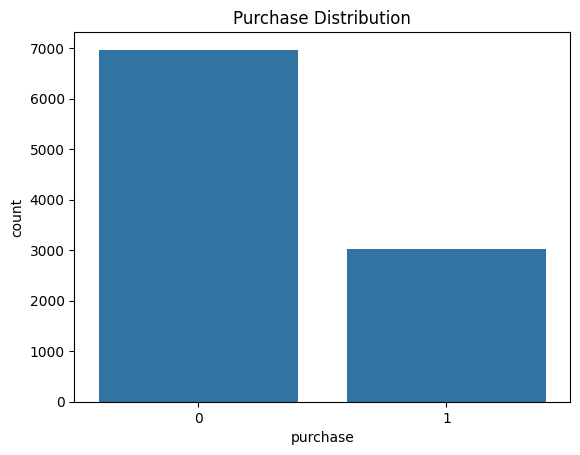

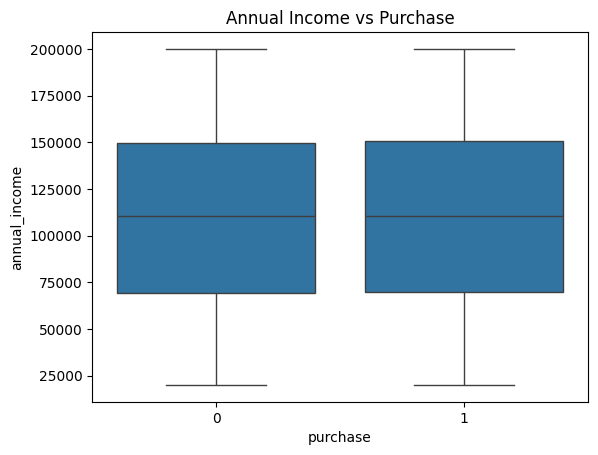

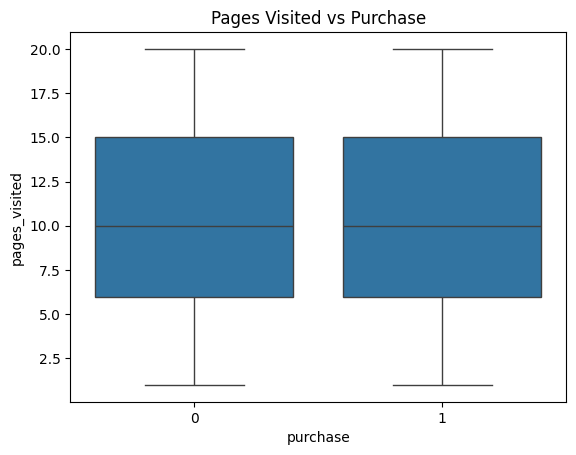